# **Libraries**

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# **Dataset Uploading**

In [11]:

df = pd.read_csv("wave_data.csv")
df.head()


time  Air Temperature (deg_C)  Sea Surface Temperature (deg_C)  \
0  7/1/16 0:00                    14.18                            12.45   
1  7/1/16 1:00                    14.22                            12.28   
2  7/1/16 2:00                    14.14                            12.22   
3  7/1/16 3:00                    14.11                            12.15   
4  7/1/16 4:00                    13.93                            12.09   

   Relative Wind Speed (m s-1) year_month  Wave Height Average (m)  \
0                         5.52    2016-07                     0.75   
1                         5.72    2016-07                     0.82   
2                         6.70    2016-07                     0.75   
3                         6.89    2016-07                     0.91   
4                         6.29    2016-07                     0.89   

   Wave Height Maximum (m)  Wave Height Significant (m)  \
0                     1.72                         1.13   
1                     1.82                         1.24   
2                     1.96                         1.14   
3                     2.10                         1.39   
4                     2.20                         1.35   

   Wave Period Average (sec)  
0                        4.6  
1                        4.9  
2                        4.6  
3                        4.5  
4                        4.4

# **EDA**

In [ ]:
df.shape # So I can know the dimensions of the dataset.

(11272, 9)

In [ ]:
df.info() # So I can know the data types of all the features that I have.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11272 entries, 0 to 11271
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             11272 non-null  object 
 1   Air Temperature (deg_C)          11272 non-null  float64
 2   Sea Surface Temperature (deg_C)  11272 non-null  float64
 3   Relative Wind Speed (m s-1)      11272 non-null  float64
 4   year_month                       11272 non-null  object 
 5   Wave Height Average (m)          11272 non-null  float64
 6   Wave Height Maximum (m)          11272 non-null  float64
 7   Wave Height Significant (m)      11272 non-null  float64
 8   Wave Period Average (sec)        11272 non-null  float64
dtypes: float64(7), object(2)
memory usage: 792.7+ KB


In [ ]:
df.isnull().sum() # Just checking for any missing value.

time                               0
Air Temperature (deg_C)            0
Sea Surface Temperature (deg_C)    0
Relative Wind Speed (m s-1)        0
year_month                         0
Wave Height Average (m)            0
Wave Height Maximum (m)            0
Wave Height Significant (m)        0
Wave Period Average (sec)          0
dtype: int64

In [ ]:
df.describe() # To know some of the most important values for each feature.



Air Temperature (deg_C)  Sea Surface Temperature (deg_C)  \
count             11272.000000                     11272.000000   
mean                 12.639698                        13.146383   
std                   2.931095                         1.980369   
min                   0.370000                         9.870000   
25%                  10.260000                        11.100000   
50%                  13.640000                        13.390000   
75%                  14.970000                        14.590000   
max                  18.500000                        19.110000   

       Relative Wind Speed (m s-1)  Wave Height Average (m)  \
count                 11272.000000             11272.000000   
mean                      5.760162                 1.455696   
std                       2.611005                 0.724702   
min                       0.360000                 0.260000   
25%                       3.840000                 0.950000   
50%                       5.655000                 1.280000   
75%                       7.470000                 1.790000   
max                      18.570000                 5.550000   

       Wave Height Maximum (m)  Wave Height Significant (m)  \
count             11272.000000                 11272.000000   
mean                  3.647412                     2.287947   
std                   1.827904                     1.149203   
min                   0.630000                     0.430000   
25%                   2.330000                     1.470000   
50%                   3.210000                     2.000000   
75%                   4.510000                     2.810000   
max                  14.670000                     8.450000   

       Wave Period Average (sec)  
count               11272.000000  
mean                    6.607341  
std                     1.376986  
min                     3.600000  
25%                     5.600000  
50%                     6.400000  
75%                     7.400000  
max                    13.400000

In [ ]:
duplicates = df.duplicated().sum() # To know if i have any duplicated vales

print(duplicates)

0


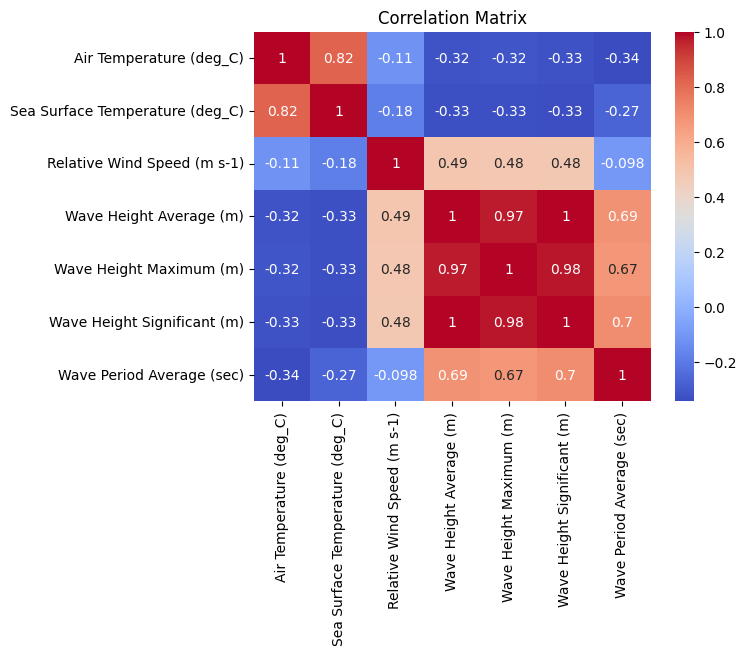

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Correlation between Wave Period Average and Wave Height Average: 0.69
Correlation between Wave Period Average and Wave Height Significant: 0.70


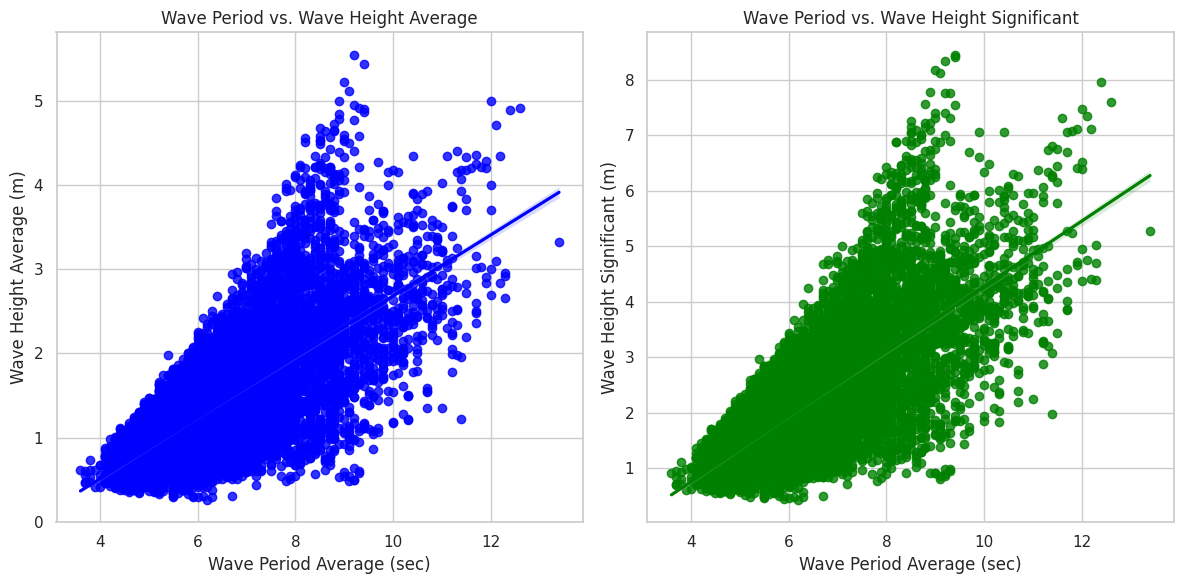

In [ ]:
# Calculate correlations
correlation_period_avg = df["Wave Period Average (sec)"].corr(df["Wave Height Average (m)"])
correlation_period_significant = df["Wave Period Average (sec)"].corr(df["Wave Height Significant (m)"])

print(f"Correlation between Wave Period Average and Wave Height Average: {correlation_period_avg:.2f}")
print(f"Correlation between Wave Period Average and Wave Height Significant: {correlation_period_significant:.2f}")

# Visualize relationships using scatter plots with regression lines
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Scatter plot for Wave Period vs. Wave Height Average
plt.subplot(1, 2, 1)
sns.regplot(x="Wave Period Average (sec)", y="Wave Height Average (m)", data=df, color="blue")
plt.title("Wave Period vs. Wave Height Average")
plt.xlabel("Wave Period Average (sec)")
plt.ylabel("Wave Height Average (m)")

# Scatter plot for Wave Period vs. Wave Height Significant
plt.subplot(1, 2, 2)
sns.regplot(x="Wave Period Average (sec)", y="Wave Height Significant (m)", data=df, color="green")
plt.title("Wave Period vs. Wave Height Significant")
plt.xlabel("Wave Period Average (sec)")
plt.ylabel("Wave Height Significant (m)")

plt.tight_layout()
plt.show()

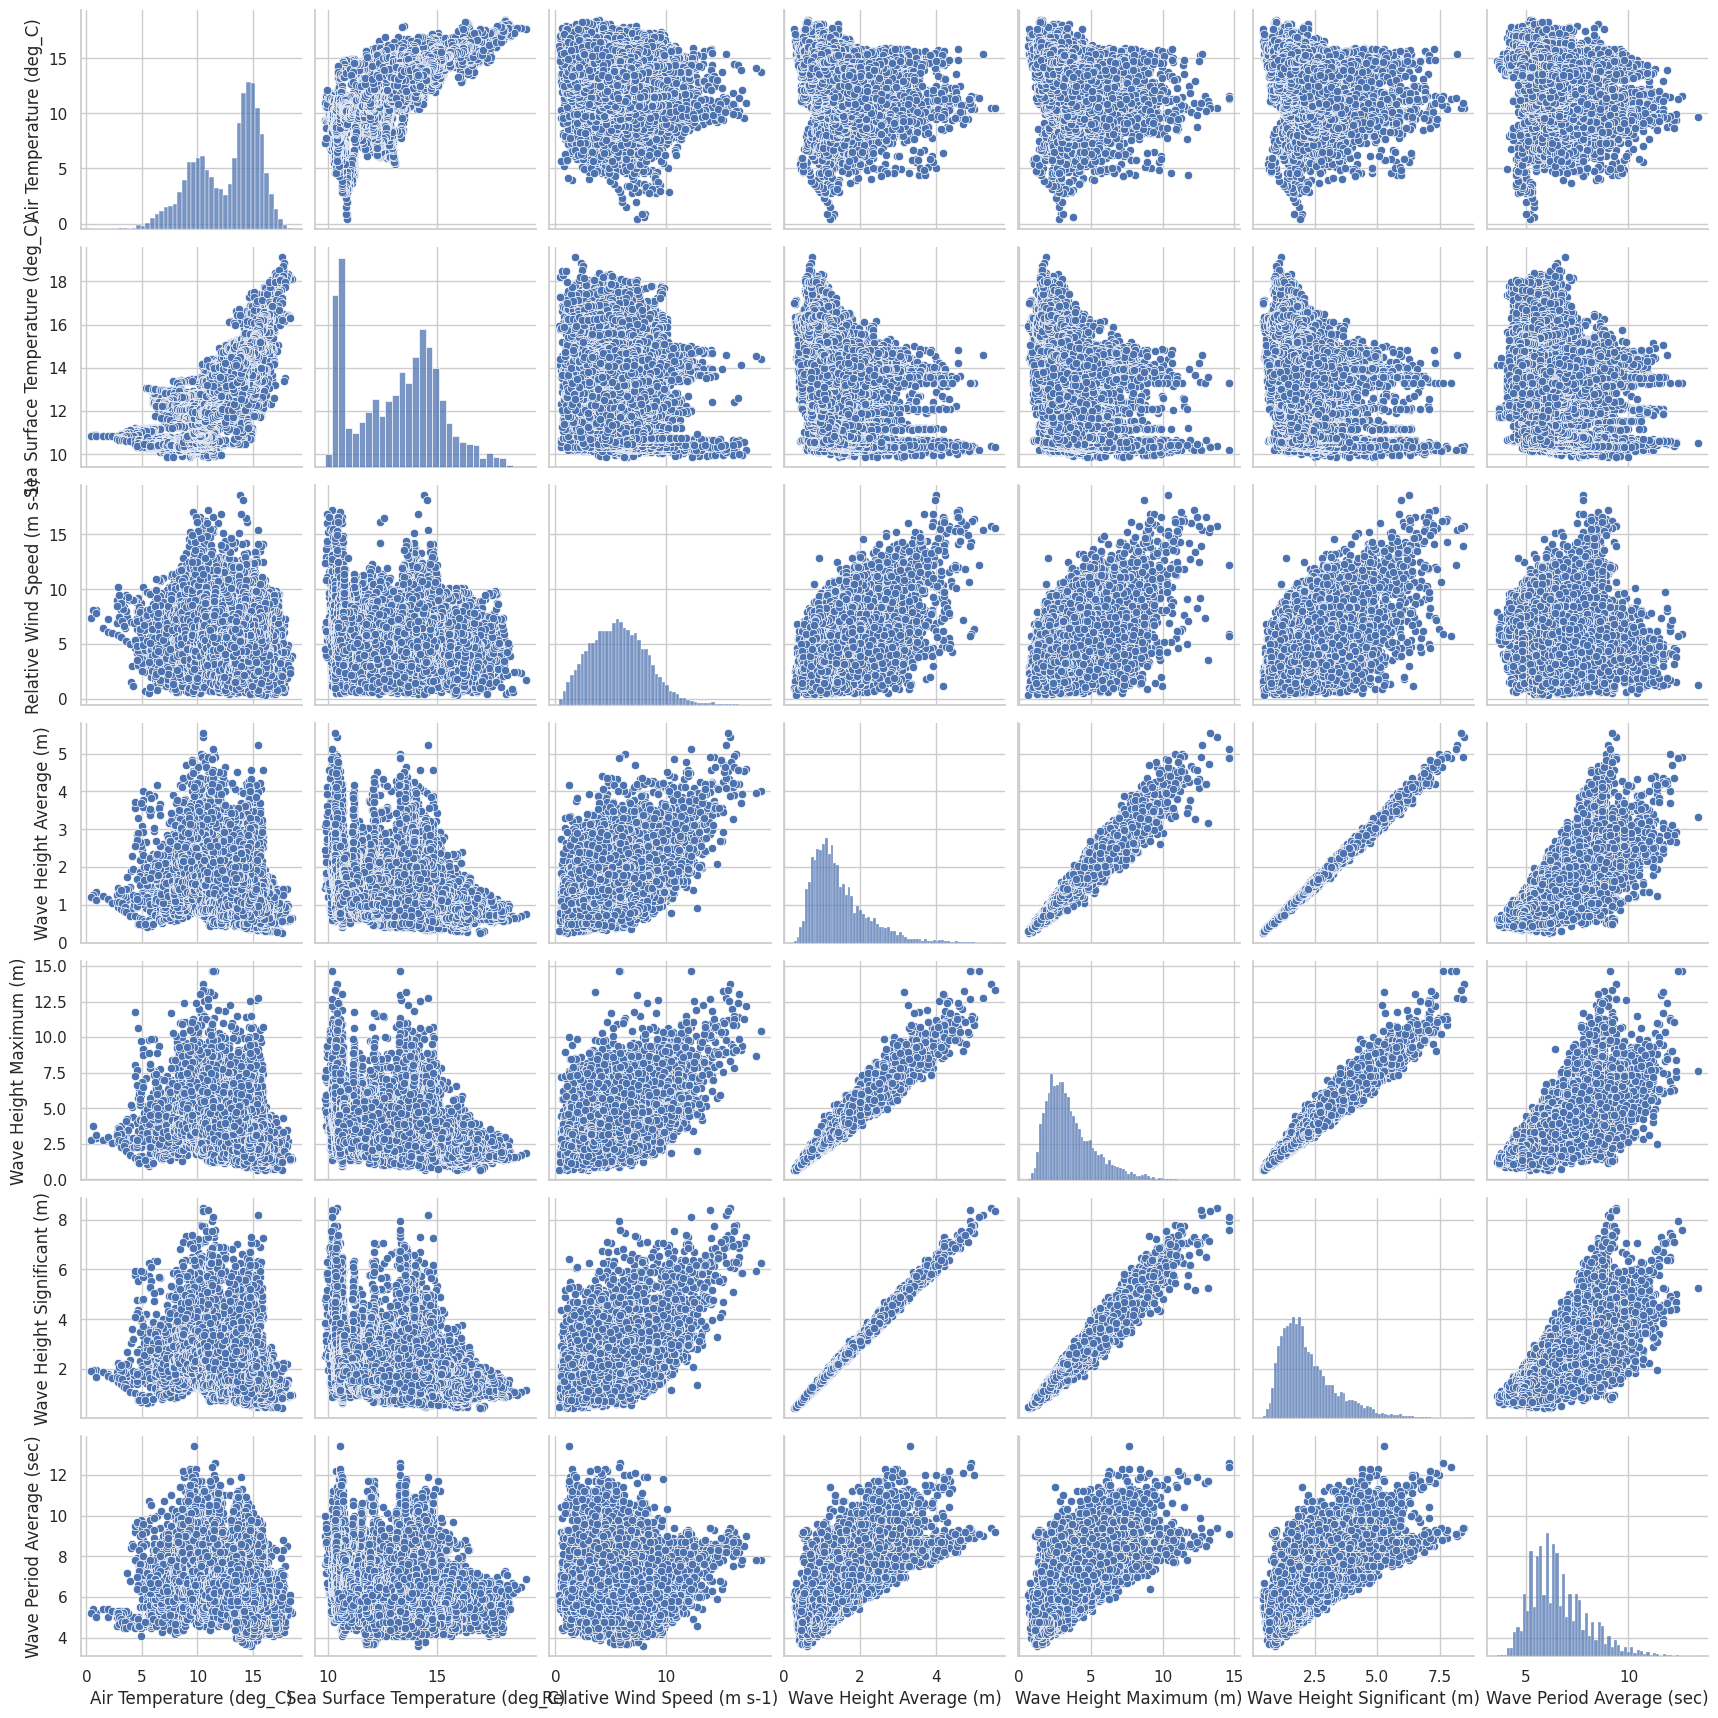

In [ ]:
# Pairplot for relationships between features
sns.pairplot(df)
plt.show()


In [ ]:
# Calculate min and max for each column
min_values = df.min()
max_values = df.max()

# Combine into a single DataFrame for better readability
min_max_df = pd.DataFrame({
    "Column": df.columns,
    "Min Value": min_values.values,
    "Max Value": max_values.values
})

# Display the min and max values
print(min_max_df)


                            Column    Min Value    Max Value
0                             time  1/1/17 0:00  9/9/17 9:00
1          Air Temperature (deg_C)         0.37         18.5
2  Sea Surface Temperature (deg_C)         9.87        19.11
3      Relative Wind Speed (m s-1)         0.36        18.57
4                       year_month      2016-07      2017-10
5          Wave Height Average (m)         0.26         5.55
6          Wave Height Maximum (m)         0.63        14.67
7      Wave Height Significant (m)         0.43         8.45
8        Wave Period Average (sec)          3.6         13.4


# **Model Uses Fixed Values For Alpha and Beta**

**Define the Model Class**

In [ ]:
class OceanWaveModel:
    """
    Simulates wave height dynamics and provides methods for analysis and visualization.
    """

    def __init__(self, alpha, beta, initial_height):
        """
        Initialize the model with alpha, beta, and the initial wave height.
        """
        self.alpha = alpha
        self.beta = beta
        self.H = initial_height
        self.time_history = []
        self.H_history = []

    def step(self, dt, U_t):
        """
        Update the wave height using the discretized equation.
        """
        self.H += (self.alpha * U_t - self.beta * self.H) * dt

    def run_with_data(self, U_series, dt):
        """
        Simulate wave heights over the wind speed data.
        """
        self.H_history = []
        self.time_history = []
        for t, U_t in enumerate(U_series):
            self.time_history.append(t * dt)
            self.H_history.append(self.H)
            self.step(dt, U_t)

    def calculate_errors(self, real_H, real_time):
        """
        Calculate error metrics (MSE, MAE), plot residuals, and show error distributions.
        """
        min_length = min(len(self.H_history), len(real_H))
        if min_length == 0:
            print("No overlapping data between predictions and real measurements.")
            return

        predicted = np.array(self.H_history[:min_length])
        real = real_H[:min_length]

        mse = mean_squared_error(real, predicted)
        mae = mean_absolute_error(real, predicted)
        residuals = real - predicted

        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Plot Actual vs Predicted
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=real, y=predicted, alpha=0.6)
        plt.plot([real.min(), real.max()], [real.min(), real.max()], 'r--')
        plt.xlabel('Actual Wave Height (m)')
        plt.ylabel('Predicted Wave Height (m)')
        plt.title('Actual vs Predicted Wave Height')
        plt.grid(True)
        plt.show()

        # Plot Residuals
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, bins=30, color='purple')
        plt.xlabel('Residuals (Actual - Predicted)')
        plt.title('Distribution of Residuals')
        plt.grid(True)
        plt.show()

    def plot_results(self, real_time, real_H):
        """
        Plot time-series comparison of actual and predicted wave heights.
        """
        plt.figure(figsize=(15, 6))
        plt.plot(real_time, real_H, label='Actual', alpha=0.7)
        plt.plot(real_time[:len(self.H_history)], self.H_history, label='Predicted', alpha=0.7)
        plt.xlabel('Time')
        plt.ylabel('Wave Height (m)')
        plt.title('Actual vs Predicted Wave Height Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()


**Load the Dataset**

In [ ]:
# Load the dataset
wave_data = pd.read_csv("wave_data.csv")

# Preprocess the dataset
wave_data['time'] = pd.to_datetime(wave_data['time'], format='%m/%d/%y %H:%M')
wave_data.sort_values('time', inplace=True)
wave_data.reset_index(drop=True, inplace=True)

# Extract relevant data
time = wave_data['time']
U_t = wave_data['Relative Wind Speed (m s-1)'].values
real_H = wave_data['Wave Height Average (m)'].values

# Confirm time step (dt)
dt = (time[1] - time[0]).seconds / 3600  # Convert seconds to hours
print(f"Time step (dt): {dt} hours")


Time step (dt): 1.0 hours


**Initialize and Run the Model**

In [ ]:
# Define model parameters
alpha = 0.5  # Replace with your desired alpha value
beta = 0.5   # Replace with your desired beta value

# Initialize the model
model = OceanWaveModel(alpha=alpha, beta=beta, initial_height=real_H[0])

# Simulate wave heights
model.run_with_data(U_t, dt)


**Calculate Errors and Visualize Results**

Mean Squared Error (MSE): 23.4663
Mean Absolute Error (MAE): 4.3161


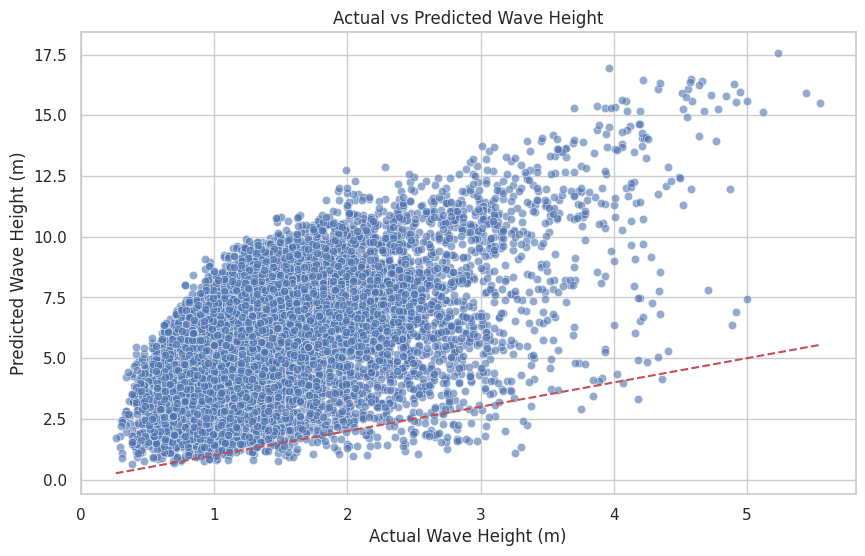

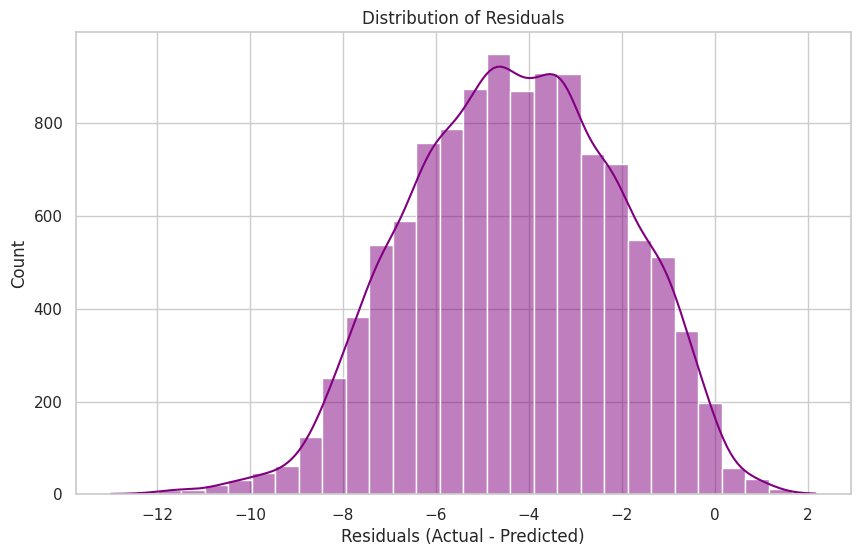

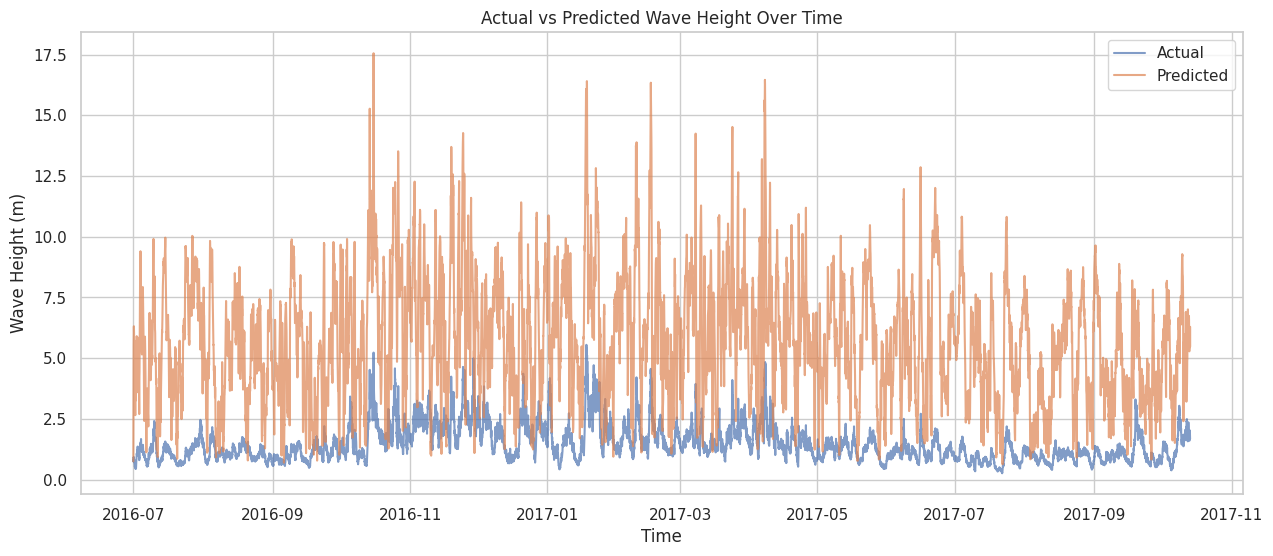

In [ ]:
# Calculate errors and metrics
model.calculate_errors(real_H=real_H, real_time=time)

# Visualize the results
model.plot_results(real_time=time, real_H=real_H)


# **Model with Simulated Annealing Optimisation**

**Define the OceanWaveModel Class**

In [ ]:
class OceanWaveModel:
    """
    Simulates wave height dynamics and provides methods for analysis and visualization.
    """

    def __init__(self, alpha, beta, initial_height):
        """
        Initialize the model with alpha, beta, and the initial wave height.
        """
        self.alpha = alpha
        self.beta = beta
        self.H = initial_height
        self.time_history = []
        self.H_history = []

    def step(self, dt, U_t):
        """
        Update the wave height using the discretized equation.
        """
        self.H += (self.alpha * U_t - self.beta * self.H) * dt

    def run_with_data(self, U_series, dt):
        """
        Simulate wave heights over the wind speed data.
        """
        self.H_history = []
        self.time_history = []
        for t, U_t in enumerate(U_series):
            self.time_history.append(t * dt)
            self.H_history.append(self.H)
            self.step(dt, U_t)

    def calculate_errors(self, real_H, real_time):
        """
        Calculate error metrics (MSE, MAE), plot residuals, and show error distributions.
        """
        min_length = min(len(self.H_history), len(real_H))
        if min_length == 0:
            print("No overlapping data between predictions and real measurements.")
            return

        predicted = np.array(self.H_history[:min_length])
        real = real_H[:min_length]

        mse = mean_squared_error(real, predicted)
        mae = mean_absolute_error(real, predicted)
        residuals = real - predicted

        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Plot Actual vs Predicted
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=real, y=predicted, alpha=0.6)
        plt.plot([real.min(), real.max()], [real.min(), real.max()], 'r--')
        plt.xlabel('Actual Wave Height (m)')
        plt.ylabel('Predicted Wave Height (m)')
        plt.title('Actual vs Predicted Wave Height')
        plt.grid(True)
        plt.show()

        # Plot Residuals
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, bins=30, color='purple')
        plt.xlabel('Residuals (Actual - Predicted)')
        plt.title('Distribution of Residuals')
        plt.grid(True)
        plt.show()

    def plot_results(self, real_time, real_H):
        """
        Plot time-series comparison of actual and predicted wave heights.
        """
        plt.figure(figsize=(15, 6))
        plt.plot(real_time, real_H, label='Actual', alpha=0.7)
        plt.plot(real_time[:len(self.H_history)], self.H_history, label='Predicted', alpha=0.7)
        plt.xlabel('Time')
        plt.ylabel('Wave Height (m)')
        plt.title('Actual vs Predicted Wave Height Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()


**Define the Cost Function**

In [ ]:
def cost_function(alpha, beta, U_t, ydata, dt):
    """
    Compute the cost for given alpha and beta using mean squared error.
    """
    model = OceanWaveModel(alpha=alpha, beta=beta, initial_height=ydata[0])
    model.run_with_data(U_t, dt)
    min_length = min(len(model.H_history), len(ydata))
    predicted_H = model.H_history[:min_length]
    return np.sum((ydata[:min_length] - np.array(predicted_H))**2)


**Define Simulated Annealing**

In [ ]:
def simulated_annealing(ydata, U_t, t_0, temp_min, initial_alpha, initial_beta, dt):
    """
    Optimize alpha and beta using Simulated Annealing.
    """
    # Initialize parameters
    alpha, beta = initial_alpha, initial_beta
    best_alpha, best_beta = alpha, beta
    best_cost = np.inf
    temp = t_0
    alpha_cooling = 0.995
    cost_history = []

    while temp > temp_min:
        # Generate new solutions for alpha and beta
        alpha_try = max(0, alpha + np.random.uniform(-0.05, 0.05))
        beta_try = max(0, beta + np.random.uniform(-0.05, 0.05))

        # Evaluate the cost for current and new parameters
        cost_current = cost_function(alpha, beta, U_t, ydata, dt)
        cost_try = cost_function(alpha_try, beta_try, U_t, ydata, dt)

        # Update the best solution if the new cost is lower
        if cost_try < best_cost:
            best_cost = cost_try
            best_alpha, best_beta = alpha_try, beta_try

        # Accept the new iteration solution with a probability or if it's better
        if cost_try < cost_current or np.random.uniform() < np.exp((cost_current - cost_try) / temp):
            alpha, beta = alpha_try, beta_try

        # Append the best cost to history
        cost_history.append(best_cost)

        # Reduce the temperature
        temp *= alpha_cooling

        # Print the current state
        print(f"Temp: {temp:.4f}, Alpha: {alpha:.4f}, Beta: {beta:.4f}, Best Cost: {best_cost:.4f}")

    # Return the best parameters and the cost history
    return best_alpha, best_beta, best_cost, cost_history


**Load and Preprocess Dataset**

In [ ]:
# Load the dataset
wave_data = pd.read_csv("wave_data.csv")

# Preprocess the dataset
wave_data['time'] = pd.to_datetime(wave_data['time'], format='%m/%d/%y %H:%M')
wave_data.sort_values('time', inplace=True)
wave_data.reset_index(drop=True, inplace=True)

# Extract relevant data
time = wave_data['time']
U_t = wave_data['Relative Wind Speed (m s-1)'].values
real_H = wave_data['Wave Height Average (m)'].values

# Confirm time step (dt)
dt = (time[1] - time[0]).seconds / 3600  # Convert seconds to hours
print(f"Time step (dt): {dt} hours")


Time step (dt): 1.0 hours


**Simulated Annealing Execution**

In [ ]:
# Parameters for Simulated Annealing
t_0 = 10.0
t_end = 0.1
initial_alpha = 0.5
initial_beta = 0.5

# Optimize alpha and beta
best_alpha, best_beta, best_cost = simulated_annealing(real_H, U_t, t_0, t_end, initial_alpha, initial_beta, dt)
print(f"Optimized alpha: {best_alpha:.4f}, beta: {best_beta:.4f}, Best Cost: {best_cost:.4f}")


Temp: 9.9500, Alpha: 0.5000, Beta: 0.5000, Best Cost: 415473.5894
Temp: 9.9002, Alpha: 0.5037, Beta: 0.5384, Best Cost: 223038.2524
Temp: 9.8507, Alpha: 0.4999, Beta: 0.5521, Best Cost: 204876.9507
Temp: 9.8015, Alpha: 0.4999, Beta: 0.5521, Best Cost: 204876.9507
Temp: 9.7525, Alpha: 0.4999, Beta: 0.5521, Best Cost: 204876.9507
Temp: 9.7037, Alpha: 0.4633, Beta: 0.5945, Best Cost: 136943.9536
Temp: 9.6552, Alpha: 0.4746, Beta: 0.6316, Best Cost: 124019.4038
Temp: 9.6069, Alpha: 0.4746, Beta: 0.6316, Best Cost: 124019.4038
Temp: 9.5589, Alpha: 0.4286, Beta: 0.5944, Best Cost: 110136.2924
Temp: 9.5111, Alpha: 0.4286, Beta: 0.5944, Best Cost: 110136.2924
Temp: 9.4635, Alpha: 0.4286, Beta: 0.5944, Best Cost: 110136.2924
Temp: 9.4162, Alpha: 0.4286, Beta: 0.5944, Best Cost: 110136.2924
Temp: 9.3691, Alpha: 0.4276, Beta: 0.6079, Best Cost: 102733.2702
Temp: 9.3223, Alpha: 0.4053, Beta: 0.6022, Best Cost: 90314.8276
Temp: 9.2757, Alpha: 0.3798, Beta: 0.5652, Best Cost: 89679.3452
Temp: 9.2293

**Model Simulation and Evaluation**

Mean Squared Error (MSE): 0.3053
Mean Absolute Error (MAE): 0.4249


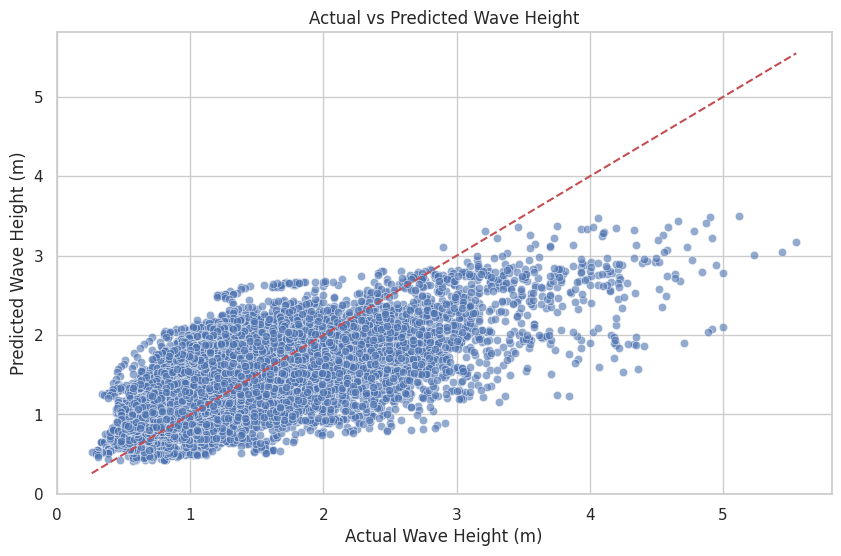

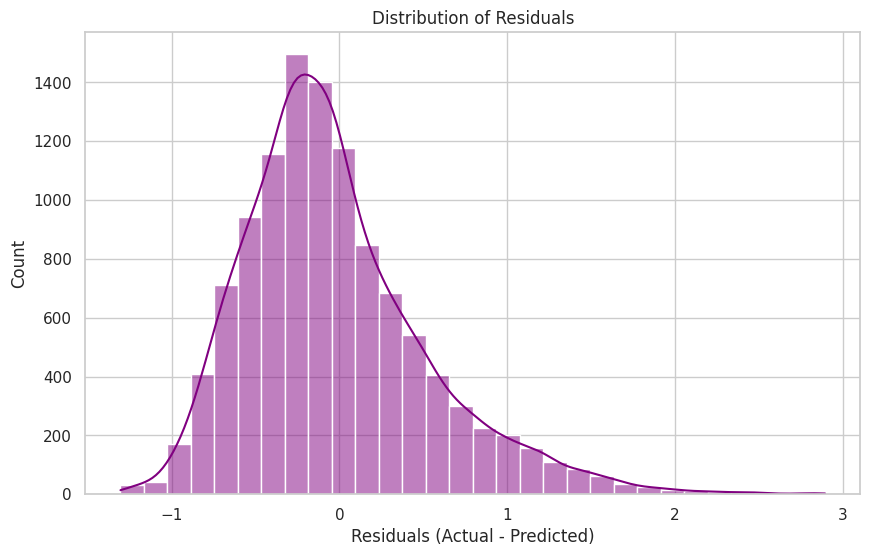

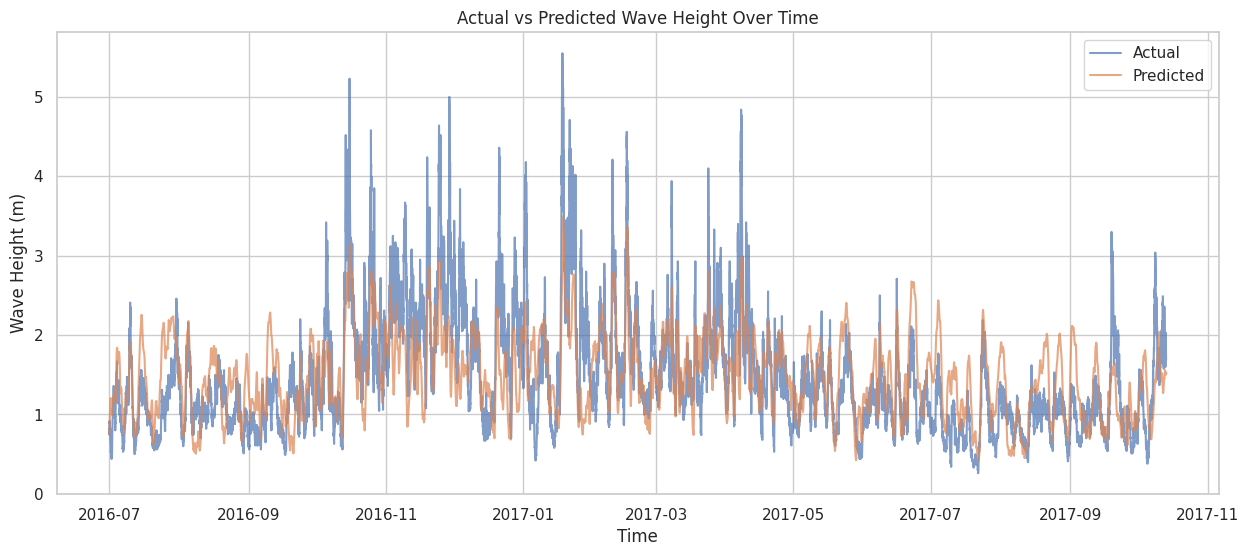

In [ ]:
# Initialize and run the model with optimized parameters
optimized_model = OceanWaveModel(alpha=best_alpha, beta=best_beta, initial_height=real_H[0])
optimized_model.run_with_data(U_t, dt)

# Calculate errors and visualize results
optimized_model.calculate_errors(real_H=real_H, real_time=time)
optimized_model.plot_results(real_time=time, real_H=real_H)


# **Model with Sine Cosine Optimization (SCA) algorithm**

Time step (dt): 1.0 hours
Iteration 0: Best Cost = 6217.728203908616
Iteration 100: Best Cost = 3397.9163350213066
Iteration 200: Best Cost = 3393.7475090729417
Iteration 300: Best Cost = 3391.3162526108017
Iteration 400: Best Cost = 3388.883883225961
Optimized Parameters: alpha=0.012337929669282127, beta=0.04879595140809321
Best Cost: 3388.883883225961
Mean Squared Error (MSE): 0.3006
Mean Absolute Error (MAE): 0.4133


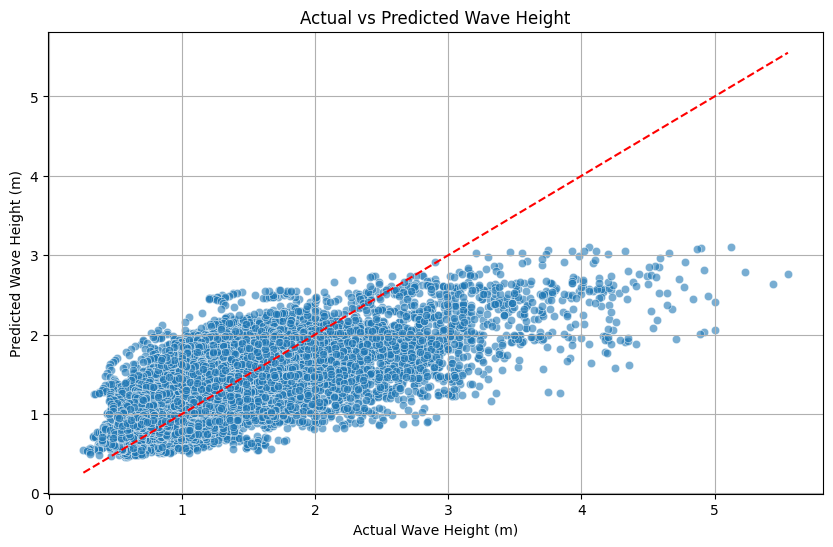

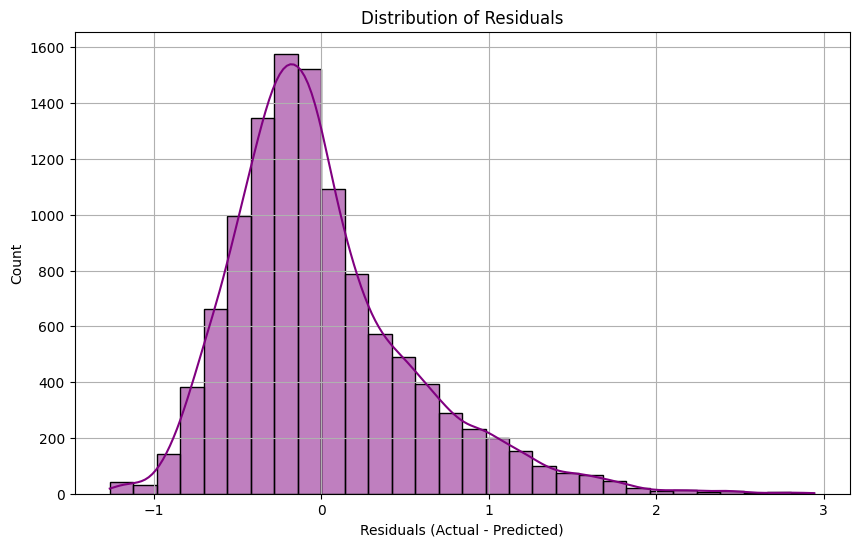

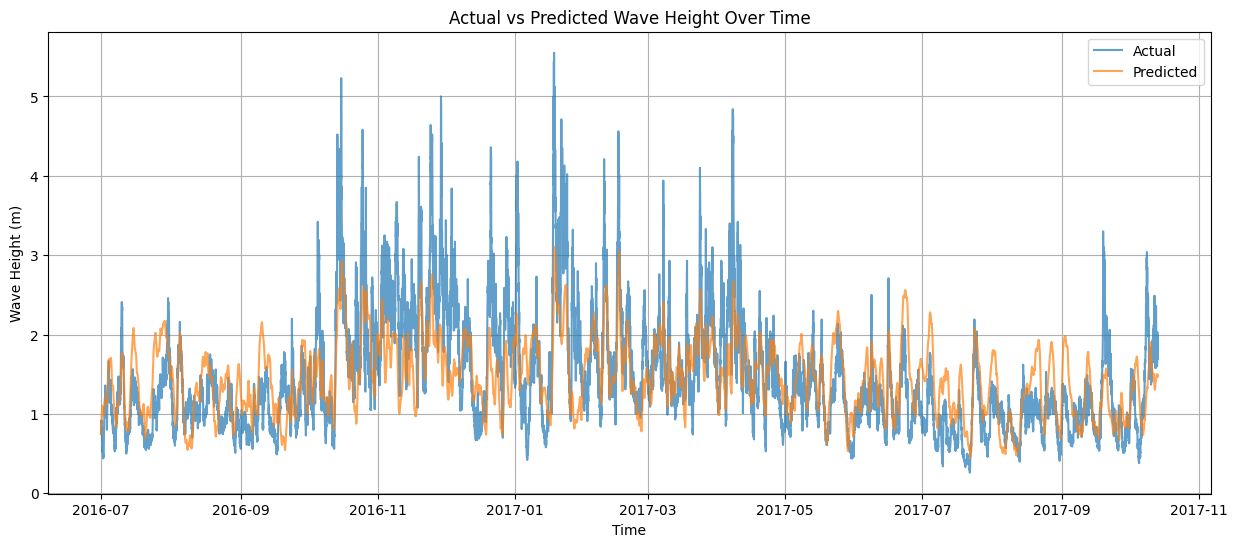

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

class OceanWaveModel:
    """
    Simulates wave height dynamics and provides methods for analysis and visualization.
    """

    def __init__(self, alpha, beta, initial_height):
        """
        Initialize the model with alpha, beta, and the initial wave height.
        """
        self.alpha = alpha
        self.beta = beta
        self.H = initial_height
        self.time_history = []
        self.H_history = []

    def step(self, dt, U_t):
        """
        Update the wave height using the discretized equation.
        """
        self.H += (self.alpha * U_t - self.beta * self.H) * dt

    def run_with_data(self, U_series, dt):
        """
        Simulate wave heights over the wind speed data.
        """
        self.H_history = []
        self.time_history = []
        for t, U_t in enumerate(U_series):
            self.time_history.append(t * dt)
            self.H_history.append(self.H)
            self.step(dt, U_t)

    def calculate_errors(self, real_H, real_time):
        """
        Calculate error metrics (MSE, MAE), plot residuals, and show error distributions.
        """
        min_length = min(len(self.H_history), len(real_H))
        if min_length == 0:
            print("No overlapping data between predictions and real measurements.")
            return

        predicted = np.array(self.H_history[:min_length])
        real = real_H[:min_length]

        SCA_mse = mean_squared_error(real, predicted)
        SCA_mae = mean_absolute_error(real, predicted)
        residuals = real - predicted

        print(f"Mean Squared Error (MSE): {SCA_mse:.4f}")
        print(f"Mean Absolute Error (MAE): {SCA_mae:.4f}")

        # Plot Actual vs Predicted
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=real, y=predicted, alpha=0.6)
        plt.plot([real.min(), real.max()], [real.min(), real.max()], 'r--')
        plt.xlabel('Actual Wave Height (m)')
        plt.ylabel('Predicted Wave Height (m)')
        plt.title('Actual vs Predicted Wave Height')
        plt.grid(True)
        plt.show()

        # Plot Residuals
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, bins=30, color='purple')
        plt.xlabel('Residuals (Actual - Predicted)')
        plt.title('Distribution of Residuals')
        plt.grid(True)
        plt.show()

    def plot_results(self, real_time, real_H):
        """
        Plot time-series comparison of actual and predicted wave heights.
        """
        plt.figure(figsize=(15, 6))
        plt.plot(real_time, real_H, label='Actual', alpha=0.7)
        plt.plot(real_time[:len(self.H_history)], self.H_history, label='Predicted', alpha=0.7)
        plt.xlabel('Time')
        plt.ylabel('Wave Height (m)')
        plt.title('Actual vs Predicted Wave Height Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

def cost_function(alpha, beta, U_t, ydata, dt):
    """
    Compute the cost for given alpha and beta using mean squared error.
    """
    model = OceanWaveModel(alpha=alpha, beta=beta, initial_height=ydata[0])
    model.run_with_data(U_t, dt)
    min_length = min(len(model.H_history), len(ydata))
    predicted_H = model.H_history[:min_length]
    return np.sum((ydata[:min_length] - np.array(predicted_H))**2)

def sine_cosine_optimization(U_t, real_H, dt, population_size=30, max_iterations=500, alpha_bounds=(0, 2), beta_bounds=(0, 2)):
    """
    Optimize parameters alpha and beta using the Sine Cosine Algorithm (SCA).
    """
    lb = np.array([alpha_bounds[0], beta_bounds[0]])
    ub = np.array([alpha_bounds[1], beta_bounds[1]])
    dim = len(lb)

    # Initialize population randomly
    population = np.random.uniform(lb, ub, (population_size, dim))
    best_solution = population[0]
    best_cost = float("inf")

    # Optimization loop
    for t in range(max_iterations):
        r1 = 2 - t * (2 / max_iterations)  # Decreasing component
        for i in range(population_size):
            # Update each solution in the population
            for j in range(dim):
                r2 = np.random.rand()
                r3 = np.random.rand()
                r4 = np.random.rand()

                if r4 < 0.5:
                    population[i, j] += r1 * np.sin(r2 * np.pi) * abs(r3 * best_solution[j] - population[i, j])
                else:
                    population[i, j] += r1 * np.cos(r2 * np.pi) * abs(r3 * best_solution[j] - population[i, j])

                # Ensure the solution stays within bounds
                population[i, j] = np.clip(population[i, j], lb[j], ub[j])

            # Evaluate the new solution
            current_cost = cost_function(population[i, 0], population[i, 1], U_t, real_H, dt)

            # Update the best solution if the new solution is better
            if current_cost < best_cost:
                best_cost = current_cost
                best_solution = population[i].copy()

        if t % 100 == 0:
            print(f"Iteration {t}: Best Cost = {best_cost}")

    return best_solution, best_cost

# Load the dataset
wave_data = pd.read_csv("wave_data.csv")

# Preprocess the dataset
wave_data['time'] = pd.to_datetime(wave_data['time'], format='%m/%d/%y %H:%M')
wave_data.sort_values('time', inplace=True)
wave_data.reset_index(drop=True, inplace=True)

# Extract relevant data
time = wave_data['time']
U_t = wave_data['Relative Wind Speed (m s-1)'].values
real_H = wave_data['Wave Height Average (m)'].values

# Confirm time step (dt)
dt = (time[1] - time[0]).seconds / 3600  # Convert seconds to hours
print(f"Time step (dt): {dt} hours")

# Optimize parameters using SCA
best_params, best_cost = sine_cosine_optimization(U_t, real_H, dt, population_size=30, max_iterations=500, alpha_bounds=(0, 2), beta_bounds=(0, 2))

optimized_alpha, optimized_beta = best_params
print(f"Optimized Parameters: alpha={optimized_alpha}, beta={optimized_beta}")
print(f"Best Cost: {best_cost}")

# Initialize and run the model with optimized parameters
optimized_model = OceanWaveModel(alpha=optimized_alpha, beta=optimized_beta, initial_height=real_H[0])
optimized_model.run_with_data(U_t, dt)

# Calculate errors and visualize results
optimized_model.calculate_errors(real_H=real_H, real_time=time)
optimized_model.plot_results(real_time=time, real_H=real_H)


# **SINDy**

Iteration 0: Cost = 0.2294269715372614
Iteration 1000: Cost = 0.005778825789312915
Iteration 2000: Cost = 0.004758379394240921
Iteration 3000: Cost = 0.004500624078869304
Iteration 4000: Cost = 0.004365370952920961
Iteration 5000: Cost = 0.004282415757668483
Iteration 6000: Cost = 0.004226731559558966
Iteration 7000: Cost = 0.004186335476219999
Iteration 8000: Cost = 0.0041550428861945685
Iteration 9000: Cost = 0.004129541893645935
Iteration 10000: Cost = 0.004107987509835698
Iteration 11000: Cost = 0.004089299227456069
Iteration 12000: Cost = 0.004072805386282403
Iteration 13000: Cost = 0.004058060946590287
Iteration 14000: Cost = 0.004044752531595671
Iteration 15000: Cost = 0.004032647711787323
Iteration 16000: Cost = 0.004021566964120297
Iteration 17000: Cost = 0.0040113674460418546
Iteration 18000: Cost = 0.004001933077091589
Iteration 19000: Cost = 0.003993168104644097
Iteration 20000: Cost = 0.0039849926821585325
Iteration 21000: Cost = 0.003977339674057273
Iteration 22000: Cost 

<ipython-input-12-c146bb58505d>:179: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_wave_height[step + 1] = predicted_wave_height[step] + dH_dt_pred * dt_value


MSE between actual and predicted wave height: 0.28604719716908333


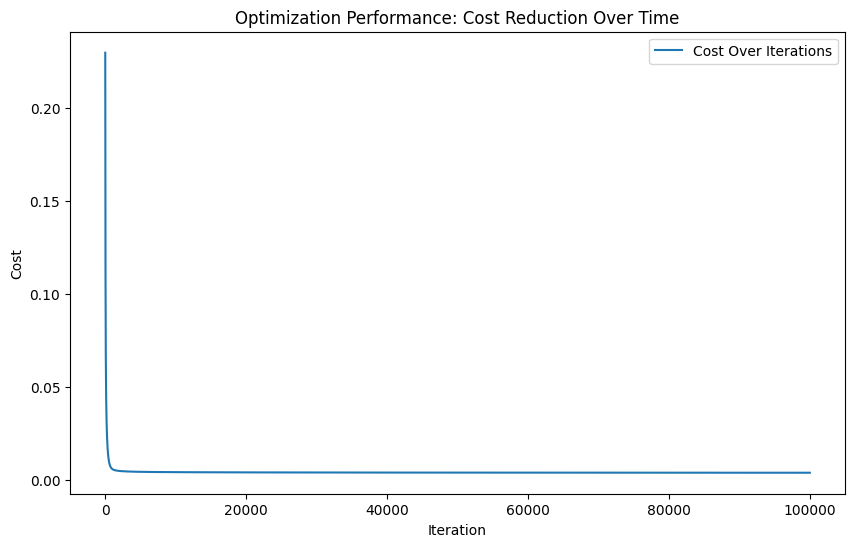

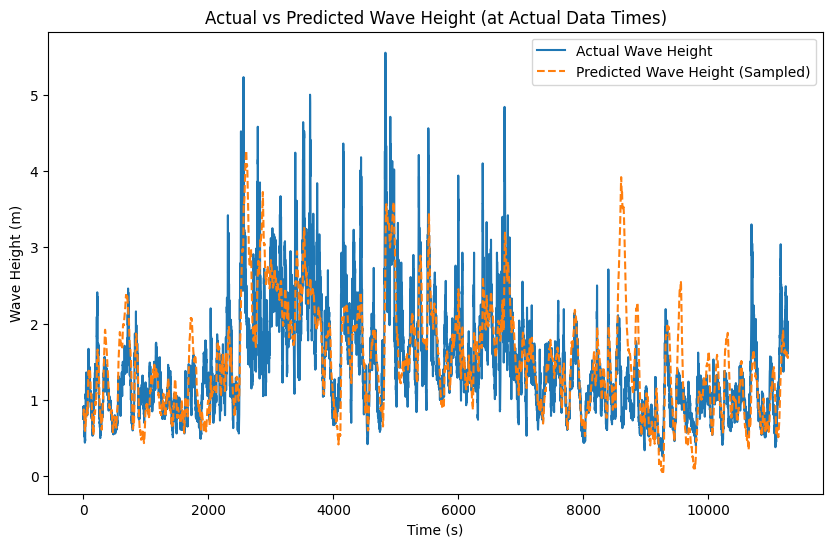

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


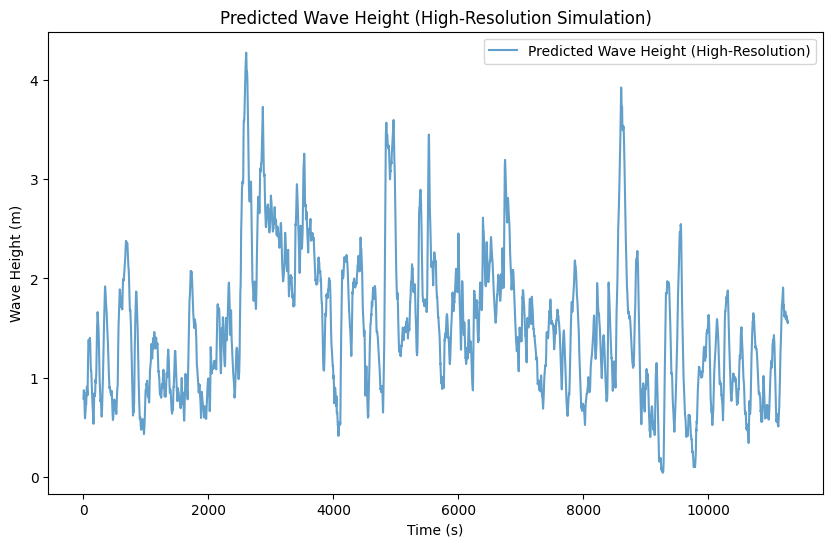

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

########################################
# Step 1: Collect the data
########################################
# Load the dataset
wave_data = pd.read_csv("wave_data.csv")


# Extract raw variables
wave_height = wave_data['Wave Height Average (m)'].values
wind_speed = wave_data['Relative Wind Speed (m s-1)'].values
sea_temp = wave_data['Sea Surface Temperature (deg_C)'].values
air_temp = wave_data['Air Temperature (deg_C)'].values
wave_period = wave_data['Wave Period Average (sec)'].values

# Normalize the data
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

wave_height_normalized = normalize(wave_height)
wind_speed_normalized = normalize(wind_speed)
sea_temp_normalized = normalize(sea_temp)
air_temp_normalized = normalize(air_temp)
wave_period_normalized = normalize(wave_period)

# Smooth wave height data
smoothed_wave_height_normalized = gaussian_filter1d(wave_height_normalized, sigma=2)

########################################
# Step 2: Compute derivatives for actual data
########################################

def central_difference_derivative(X, dt):
    X = np.asarray(X)
    N = len(X)
    dX_dt = (X[2:] - X[:-2]) / (2 * dt)
    dX_dt = dX_dt.reshape(-1, 1)
    return dX_dt

# Actual data spacing is 1 unit
dt_actual = 1.0
dH_dt = central_difference_derivative(smoothed_wave_height_normalized, dt_actual)

########################################
# Step 3: Construct the Candidate Library
########################################

# Trim arrays to match length of dH_dt (N-2)
smoothed_wave_height_trimmed = smoothed_wave_height_normalized[1:-1]
wind_speed_trimmed = wind_speed_normalized[1:-1]
sea_temp_trimmed = sea_temp_normalized[1:-1]
air_temp_trimmed = air_temp_normalized[1:-1]
wave_period_trimmed = wave_period_normalized[1:-1]

X = np.column_stack((
    smoothed_wave_height_trimmed,
    wind_speed_trimmed,
    sea_temp_trimmed,
    air_temp_trimmed,
    wave_period_trimmed
))

def candidate_library(X):
    return np.column_stack([
        np.ones(X.shape[0]),  # Constant term
        X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4],  # Linear terms
        X[:, 0] - X[:, 1], X[:, 0] - X[:, 2], X[:, 0] - X[:, 3], X[:, 0] - X[:, 4],  # Pairwise subtractions
        X[:, 1] - X[:, 2], X[:, 1] - X[:, 3], X[:, 1] - X[:, 4],
        X[:, 2] - X[:, 3], X[:, 2] - X[:, 4], X[:, 3] - X[:, 4],
        np.sin(X[:, 0] - X[:, 1]), np.sin(X[:, 2] - X[:, 3]), np.sin(X[:, 4] - X[:, 0]),  # Subtracted sin terms
        np.cos(X[:, 0] - X[:, 1]), np.cos(X[:, 2] - X[:, 3]), np.cos(X[:, 4] - X[:, 0])   # Subtracted cos terms
    ])

library_matrix = candidate_library(X)

########################################
# Step 4: Define a suitable SINDy cost function
########################################

def sindy_cost_function(Xi, Theta, dXdt, lambda_l1=0.0):
    predictions = Theta @ Xi
    mse = np.mean((dXdt - predictions)**2)
    l1_penalty = lambda_l1 * np.sum(np.abs(Xi))
    return mse + l1_penalty

########################################
# Step 5: Apply sparse regression (L1-regularized gradient descent)
########################################

def numerical_gradient_sindy(Xi, dt, Theta, dXdt, lambda_l1=0.1):
    Xi_flat = Xi.flatten()
    grad = np.zeros_like(Xi_flat)
    for i in range(len(Xi_flat)):
        Xi_forward = Xi_flat.copy()
        Xi_backward = Xi_flat.copy()

        Xi_forward[i] += dt
        Xi_backward[i] -= dt

        cost_forward = sindy_cost_function(Xi_forward.reshape(Xi.shape), Theta, dXdt, lambda_l1=lambda_l1)
        cost_backward = sindy_cost_function(Xi_backward.reshape(Xi.shape), Theta, dXdt, lambda_l1=lambda_l1)

        grad[i] = (cost_forward - cost_backward) / (2 * dt)

    return grad.reshape(Xi.shape)

def gradient_descent_sindy_numerical(Theta, dXdt, lambda_l1=0.1, initial_params=None, learning_rate=1e-3, dt=1e-6, max_iterations=20000):
    if initial_params is None:
        Xi = np.random.randn(Theta.shape[1], dXdt.shape[1]) * 0.1
    else:
        Xi = np.array(initial_params).reshape(Theta.shape[1], dXdt.shape[1])

    cost_history = []
    for iteration in range(max_iterations):
        grad = numerical_gradient_sindy(Xi, dt, Theta, dXdt, lambda_l1=lambda_l1)
        Xi -= learning_rate * grad
        cost = sindy_cost_function(Xi, Theta, dXdt, lambda_l1=lambda_l1)
        cost_history.append(cost)

        if iteration % 1000 == 0:
            print(f"Iteration {iteration}: Cost = {cost}")

    return Xi, cost_history

lambda_l1 = 0.0
coefficients, cost_history = gradient_descent_sindy_numerical(
    library_matrix, dH_dt, lambda_l1=lambda_l1,
    learning_rate=1e-3, dt=1e-6, max_iterations=100000
)

print("Coefficients:\n", coefficients)

########################################
# Integrate the discovered model
########################################

def construct_feature_row(wave_h, wind_s, sea_t, air_t, wave_p):
    x = np.array([wave_h, wind_s, sea_t, air_t, wave_p]).reshape(1, -1)
    return candidate_library(x)  # returns a 1x(number_of_features) vector

# Use a smaller dt for the simulation
dt_value = 0.001  # finer time step

N = len(wave_height_normalized)
T = (N - 1) * dt_actual  # total time based on actual data
num_steps = int(T / dt_value)

# Initialize predicted wave height for the full simulation time
predicted_wave_height = np.zeros(num_steps + 1)
predicted_wave_height[0] = smoothed_wave_height_normalized[0]  # initial condition

for step in range(num_steps):
    current_time = step * dt_value
    idx = int(current_time / dt_actual)

    if idx >= N:
        # We've exceeded the data range for external variables
        break

    # External variables from the closest known data point
    wind = wind_speed_normalized[idx]
    sea = sea_temp_normalized[idx]
    air = air_temp_normalized[idx]
    wp = wave_period_normalized[idx]

    Theta_row = construct_feature_row(
        predicted_wave_height[step],
        wind,
        sea,
        air,
        wp
    )
    dH_dt_pred = Theta_row @ coefficients
    predicted_wave_height[step + 1] = predicted_wave_height[step] + dH_dt_pred * dt_value

# Convert predicted normalized values back to original scale
original_mean = np.mean(wave_height)
original_std = np.std(wave_height)
predicted_wave_height_unscaled = predicted_wave_height * original_std + original_mean

########################################
# Compare Actual vs Predicted
########################################

# Actual time vector (coarse)
time_actual = np.arange(N) * dt_actual
# Predicted time vector (fine)
time_pred = np.arange(num_steps + 1) * dt_value

# To compare directly, sample the predicted data at actual times
step_interval = int(dt_actual / dt_value)  # how many fine steps per actual step
pred_indices = np.arange(0, step_interval * (N - 1) + 1, step_interval)
pred_indices = pred_indices[:N]  # ensure same length

if pred_indices[-1] < len(predicted_wave_height_unscaled):
    predicted_wave_height_sampled = predicted_wave_height_unscaled[pred_indices]
else:
    # If, for some reason, we ran out of predicted steps, truncate to match lengths
    min_len = min(len(wave_height), len(pred_indices), len(predicted_wave_height_unscaled))
    pred_indices = pred_indices[:min_len]
    predicted_wave_height_sampled = predicted_wave_height_unscaled[pred_indices]
    wave_height = wave_height[:min_len]
    time_actual = time_actual[:min_len]

# Compute MSE
mse_value = mean_squared_error(wave_height, predicted_wave_height_sampled)
print(f"MSE between actual and predicted wave height: {mse_value}")

########################################
# Plotting
########################################

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history, label='Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Optimization Performance: Cost Reduction Over Time')
plt.legend()
plt.show()

# Plot actual vs predicted at actual data times
plt.figure(figsize=(10, 6))
plt.plot(time_actual, wave_height, label='Actual Wave Height')
plt.plot(time_actual, predicted_wave_height_sampled, label='Predicted Wave Height (Sampled)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Wave Height (m)')
plt.title('Actual vs Predicted Wave Height (at Actual Data Times)')
plt.legend()
plt.show()

# Plot the full high-resolution predicted time series
plt.figure(figsize=(10, 6))
plt.plot(time_pred, predicted_wave_height_unscaled, label='Predicted Wave Height (High-Resolution)', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Wave Height (m)')
plt.title('Predicted Wave Height (High-Resolution Simulation)')
plt.legend()
plt.show()


In [27]:
sindy_mse_value = mean_squared_error(wave_height, predicted_wave_height_sampled)
print(f"MSE between actual and predicted wave height: {sindy_mse_value}")


MSE between actual and predicted wave height: 0.28604719716908333


In [26]:
from sklearn.metrics import mean_absolute_error

sindy_mae_value = mean_absolute_error(wave_height, predicted_wave_height_sampled)
print(f"MAE between actual and predicted wave height: {sindy_mae_value}")


MAE between actual and predicted wave height: 0.3634963004458565


In [28]:
# Compute MSE and MAE
mse_value = mean_squared_error(wave_height, predicted_wave_height_sampled)
mae_value = mean_absolute_error(wave_height, predicted_wave_height_sampled)

print(f"MSE between actual and predicted wave height: {mse_value}")
print(f"MAE between actual and predicted wave height: {mae_value}")


MSE between actual and predicted wave height: 0.28604719716908333
MAE between actual and predicted wave height: 0.3634963004458565


# **Comparing the performance of the produced models**

In [34]:
import pandas as pd

# Define the error metrics for both models
comparison_data = {
    'Model': ['SINDy', 'Sine Cosine Optimization',"Simulated Annealing Optimisation"],
    'MSE': [sindy_mse_value, "0.3006","0.3053"],
    'MAE': [sindy_mae_value, "0.4133","0.4249"]
}

# Create a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the DataFrame
print(comparison_df)


                              Model       MSE       MAE
0                             SINDy  0.286047  0.363496
1          Sine Cosine Optimization    0.3006    0.4133
2  Simulated Annealing Optimisation    0.3053    0.4249


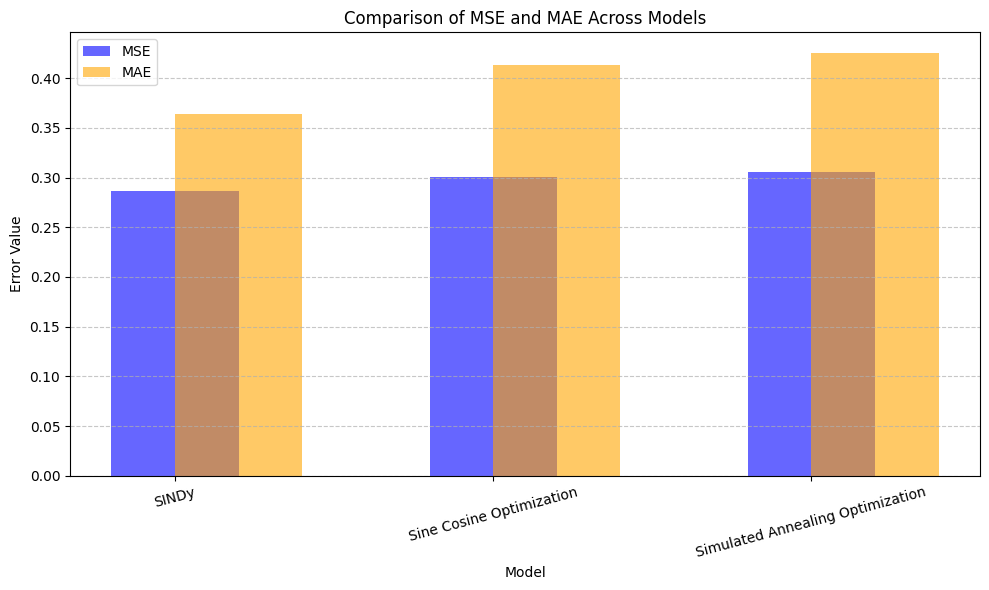

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': ['SINDy', 'Sine Cosine Optimization', 'Simulated Annealing Optimization'],
    'MSE': [0.286047, 0.3006, 0.3053],
    'MAE': [0.363496, 0.4133, 0.4249]
}

comparison_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

plt.bar(comparison_df['Model'], comparison_df['MSE'], alpha=0.6, label='MSE', color='blue', width=0.4, align='center')

plt.bar(comparison_df['Model'], comparison_df['MAE'], alpha=0.6, label='MAE', color='orange', width=0.4, align='edge')

plt.xlabel('Model')
plt.ylabel('Error Value')
plt.title('Comparison of MSE and MAE Across Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# **More information**

**Calculate (Total Simulation Time) and (Time Step):**

In [ ]:
wave_data = pd.read_csv("wave_data.csv")

# Convert the 'time' column to datetime format
wave_data['time'] = pd.to_datetime(wave_data['time'])

# Sort the data by time to ensure proper order
wave_data.sort_values('time', inplace=True)

# Calculate the time step (∆t)
dt = (wave_data['time'].iloc[1] - wave_data['time'].iloc[0]).total_seconds() / 3600  # Convert seconds to hours
print(f"Time step (∆t): {dt} hours")

# Calculate the total simulation time
total_time = (wave_data['time'].iloc[-1] - wave_data['time'].iloc[0]).total_seconds() / 3600  # Convert seconds to hours
print(f"Total simulation time: {total_time} hours")


<ipython-input-24-3c215c910852>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wave_data['time'] = pd.to_datetime(wave_data['time'])


Time step (∆t): 1.0 hours
Total simulation time: 11271.0 hours


**Initial Wave Height (H0) (Data Sorted By Time):**

In [ ]:
wave_data = pd.read_csv("wave_data.csv")

# Sort the dataset by time to ensure proper order
wave_data.sort_values('time', inplace=True)

# Calculate the initial wave height (H0)
initial_wave_height = wave_data['Wave Height Average (m)'].iloc[0]
print(f"Initial wave height (H0): {initial_wave_height}")


Initial wave height (H0): 1.33


# **Parameters Trying:**

**Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

class OceanWaveModel:
    """
    Simulates wave height dynamics and provides methods for analysis and visualization.
    """

    def __init__(self, alpha, beta, initial_height):
        """
        Initialize the model with alpha, beta, and the initial wave height.
        """
        self.alpha = alpha
        self.beta = beta
        self.H = initial_height
        self.time_history = []
        self.H_history = []

    def step(self, dt, U_t):
        """
        Update the wave height using the discretized equation.
        """
        self.H += (self.alpha * U_t - self.beta * self.H) * dt

    def run_with_data(self, U_series, dt):
        """
        Simulate wave heights over the wind speed data.
        """
        self.H_history = []
        self.time_history = []
        for t, U_t in enumerate(U_series):
            self.time_history.append(t * dt)
            self.H_history.append(self.H)
            self.step(dt, U_t)

**Growth Coefficient (α), Dissipation Coefficient (β):**

Time step (dt): 1.0 hours
Plots for alpha=0.3 with beta=0.2, 0.8:


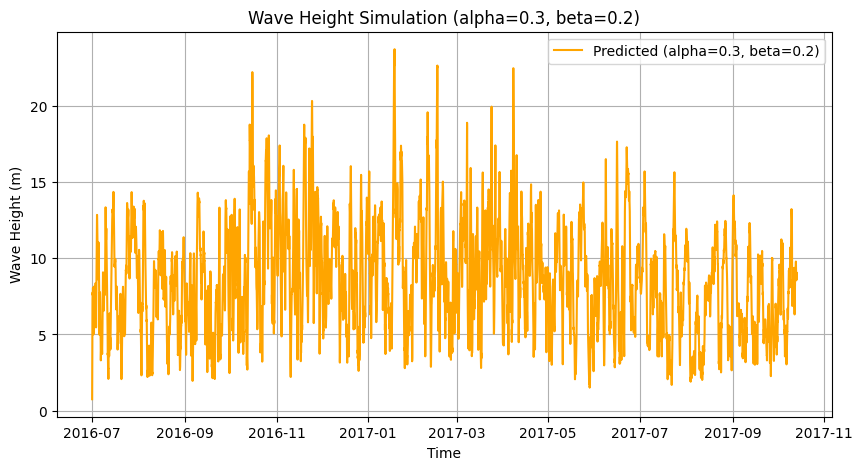

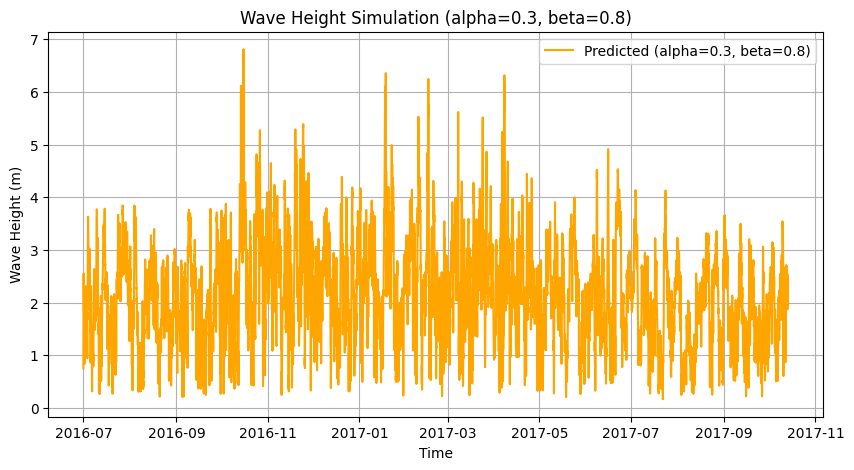

Plots for beta=0.3 with alpha=0.2, 0.8:


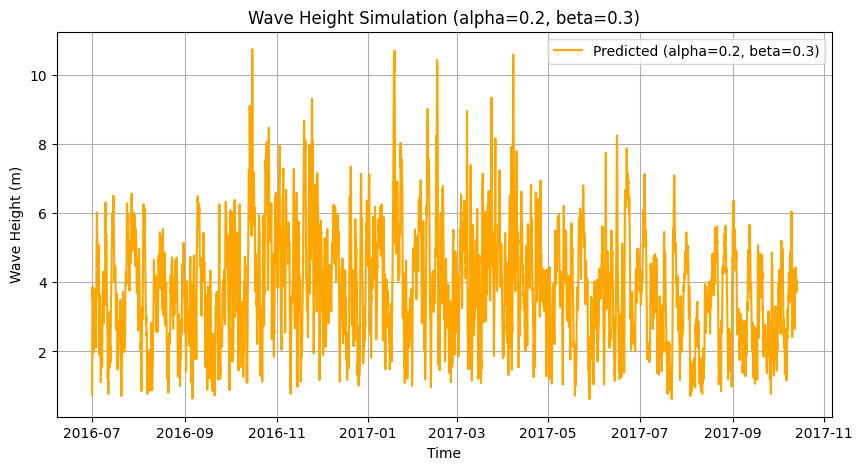

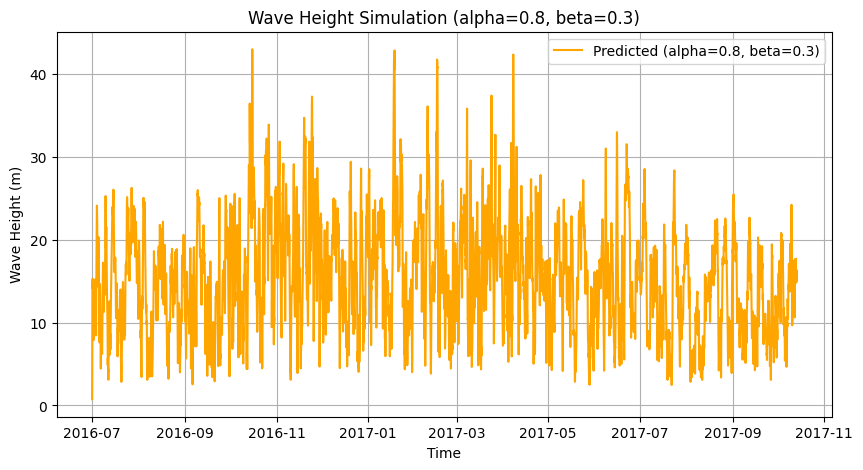

In [ ]:
def plot_wave_height_simulations(alpha_values, beta_values, constant_alpha=None, constant_beta=None, U_t=None, real_H=None, time=None, dt=None):
    """
    Generates and plots wave height simulations for specified alpha and beta values, showing only the predicted wave heights.
    """
    if constant_alpha is not None:
        for beta in beta_values:
            model = OceanWaveModel(alpha=constant_alpha, beta=beta, initial_height=real_H[0])
            model.run_with_data(U_t, dt)

            plt.figure(figsize=(10, 5))
            plt.plot(time[:len(model.H_history)], model.H_history, label=f"Predicted (alpha={constant_alpha}, beta={beta})", color='orange')
            plt.xlabel("Time")
            plt.ylabel("Wave Height (m)")
            plt.title(f"Wave Height Simulation (alpha={constant_alpha}, beta={beta})")
            plt.legend()
            plt.grid()
            plt.show()

    if constant_beta is not None:
        for alpha in alpha_values:
            model = OceanWaveModel(alpha=alpha, beta=constant_beta, initial_height=real_H[0])
            model.run_with_data(U_t, dt)

            plt.figure(figsize=(10, 5))
            plt.plot(time[:len(model.H_history)], model.H_history, label=f"Predicted (alpha={alpha}, beta={constant_beta})", color='orange')
            plt.xlabel("Time")
            plt.ylabel("Wave Height (m)")
            plt.title(f"Wave Height Simulation (alpha={alpha}, beta={constant_beta})")
            plt.legend()
            plt.grid()
            plt.show()


# Load the dataset
wave_data = pd.read_csv("wave_data.csv")

# Preprocess the dataset
wave_data['time'] = pd.to_datetime(wave_data['time'], format='%m/%d/%y %H:%M')
wave_data.sort_values('time', inplace=True)
wave_data.reset_index(drop=True, inplace=True)

# Extract relevant data
time = wave_data['time']
U_t = wave_data['Relative Wind Speed (m s-1)'].values
real_H = wave_data['Wave Height Average (m)'].values

# Confirm time step (dt)
dt = (time.iloc[1] - time.iloc[0]).seconds / 3600  # Convert seconds to hours
print(f"Time step (dt): {dt} hours")

# Set alpha and beta values
alpha_values = [0.2, 0.8]
beta_values = [0.2, 0.8]

# Generate plots
print("Plots for alpha=0.3 with beta=0.2, 0.8:")
plot_wave_height_simulations(alpha_values=None, beta_values=[0.2, 0.8], constant_alpha=0.3, U_t=U_t, real_H=real_H, time=time, dt=dt)

print("Plots for beta=0.3 with alpha=0.2, 0.8:")
plot_wave_height_simulations(alpha_values=[0.2, 0.8], beta_values=None, constant_beta=0.3, U_t=U_t, real_H=real_H, time=time, dt=dt)


**Current Wave Height (H(t))**

Simulations for different initial wave heights:


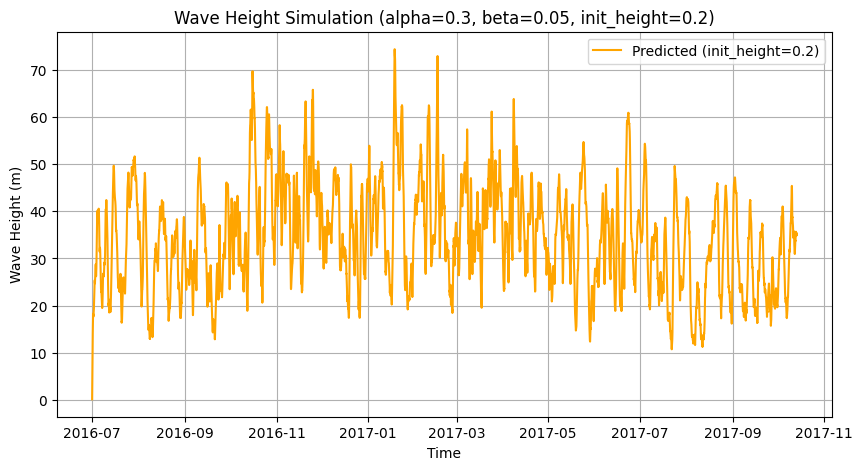

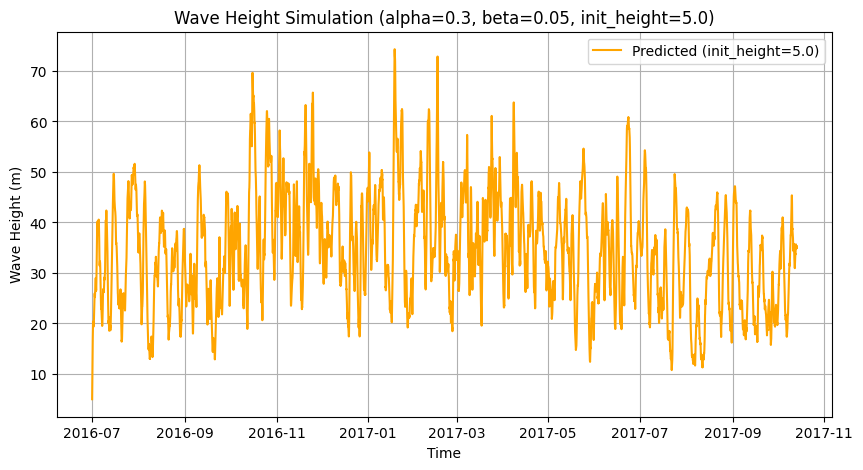

In [ ]:
def plot_wave_height_for_initial_heights(alpha, beta, initial_heights, U_t=None, time=None, dt=None):
    """
    Generates and plots wave height simulations for different initial wave heights using fixed alpha and beta.
    """
    for initial_height in initial_heights:
        model = OceanWaveModel(alpha=alpha, beta=beta, initial_height=initial_height)
        model.run_with_data(U_t, dt)

        plt.figure(figsize=(10, 5))
        plt.plot(
            time[:len(model.H_history)],
            model.H_history,
            label=f"Predicted (init_height={initial_height})",
            color='orange'
        )
        plt.xlabel("Time")
        plt.ylabel("Wave Height (m)")
        plt.title(f"Wave Height Simulation (alpha={alpha}, beta={beta}, init_height={initial_height})")
        plt.legend()
        plt.grid()
        plt.show()

# Define specific alpha, beta, and initial heights
alpha = 0.3  # Set the fixed value of alpha
beta = 0.05   # Set the fixed value of beta
initial_heights = [0.2, 5.00]

# Generate plots for varying initial heights
print("Simulations for different initial wave heights:")
plot_wave_height_for_initial_heights(
    alpha=alpha,
    beta=beta,
    initial_heights=initial_heights,
    U_t=U_t,
    time=time,
    dt=dt
)


Simulations for different initial wave heights (focus on initial behavior):


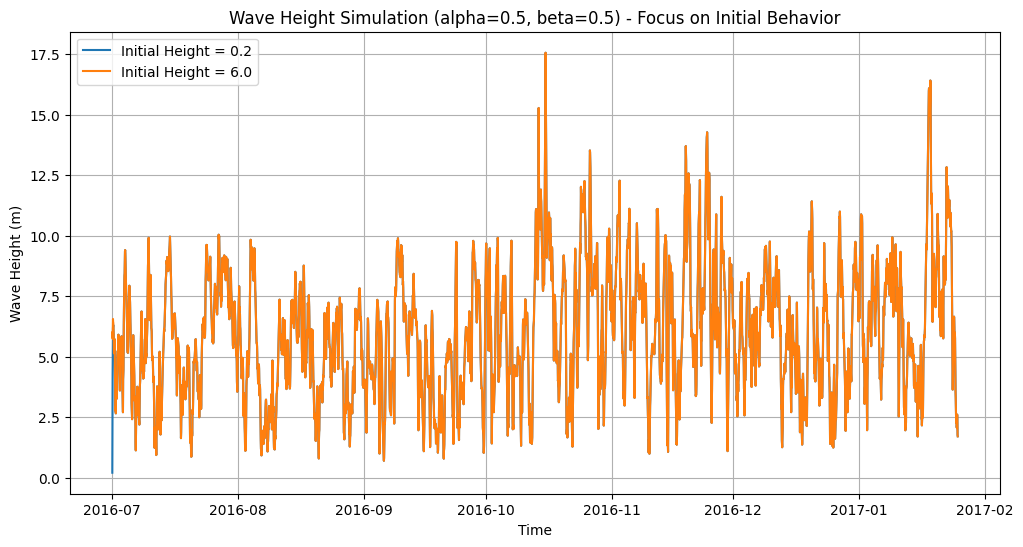

In [ ]:
def plot_wave_height_for_initial_heights(alpha, beta, initial_heights, U_t=None, time=None, dt=None, focus_on_initial=True):
    """
    Generates and overlays wave height simulations for different initial wave heights using fixed alpha and beta.
    """
    if focus_on_initial:
        # Use a subset of the time and wind speed to focus on initial behavior
        time = time[:5000]  # First 100 time steps
        U_t = U_t[:5000]

    plt.figure(figsize=(12, 6))
    for initial_height in initial_heights:
        model = OceanWaveModel(alpha=alpha, beta=beta, initial_height=initial_height)
        model.run_with_data(U_t, dt)

        plt.plot(
            time[:len(model.H_history)],
            model.H_history,
            label=f"Initial Height = {initial_height}"
        )

    plt.xlabel("Time")
    plt.ylabel("Wave Height (m)")
    plt.title(f"Wave Height Simulation (alpha={alpha}, beta={beta}) - Focus on Initial Behavior")
    plt.legend()
    plt.grid()
    plt.show()

# Define specific alpha, beta, and initial heights
alpha = 0.5  # Set the fixed value of alpha
beta = 0.5  # Further reduce beta to slow stabilization
initial_heights = [0.2, 6.0]

# Generate plots for varying initial heights
print("Simulations for different initial wave heights (focus on initial behavior):")
plot_wave_height_for_initial_heights(
    alpha=alpha,
    beta=beta,
    initial_heights=initial_heights,
    U_t=U_t,
    time=time,
    dt=dt
)


**Wind Speed (U(t))**


Simulations for two wind speed scenarios:


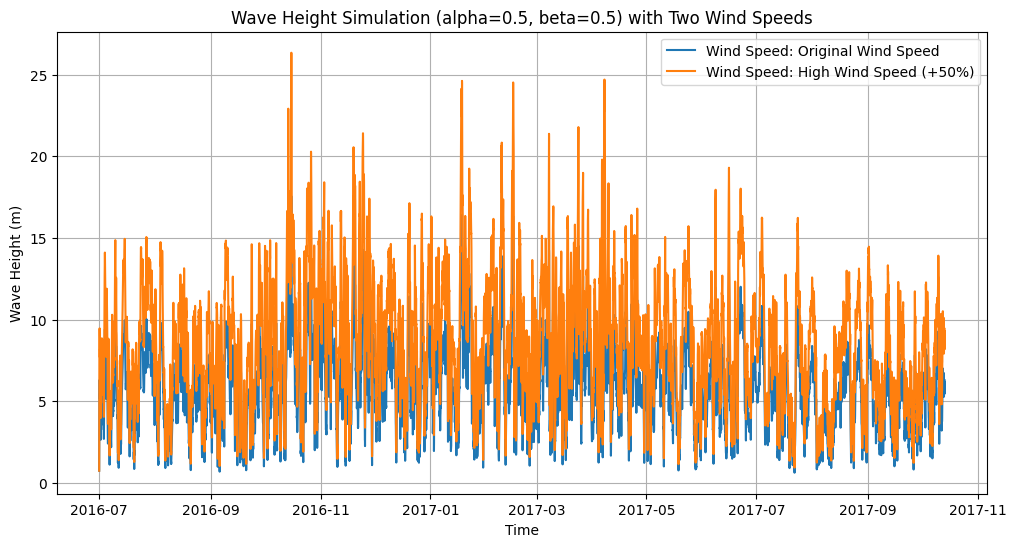

In [ ]:
def plot_wave_height_for_two_wind_speeds(alpha, beta, wind_speed_scenarios, real_H, time, dt):
    """
    Generates and overlays wave height simulations for two wind speed scenarios using fixed alpha and beta.
    """
    plt.figure(figsize=(12, 6))
    for scenario_name, U_t_scenario in wind_speed_scenarios.items():
        model = OceanWaveModel(alpha=alpha, beta=beta, initial_height=real_H[0])
        model.run_with_data(U_t_scenario, dt)

        plt.plot(
            time[:len(model.H_history)],
            model.H_history,
            label=f"Wind Speed: {scenario_name}"
        )

    plt.xlabel("Time")
    plt.ylabel("Wave Height (m)")
    plt.title(f"Wave Height Simulation (alpha={alpha}, beta={beta}) with Two Wind Speeds")
    plt.legend()
    plt.grid()
    plt.show()

# Define fixed alpha and beta
alpha = 0.5  # Fixed alpha
beta = 0.5   # Fixed beta

# Define two wind speed scenarios
wind_speed_scenarios = {
    "Original Wind Speed": U_t,
    "High Wind Speed (+50%)": U_t * 1.5  # Wind speed increased by 50%
}

# Generate plots for the two wind speed scenarios
print("Simulations for two wind speed scenarios:")
plot_wave_height_for_two_wind_speeds(
    alpha=alpha,
    beta=beta,
    wind_speed_scenarios=wind_speed_scenarios,
    real_H=real_H,
    time=time,
    dt=dt
)


**Time Step (Δt)**

Simulations for two time step scenarios (separate plots):


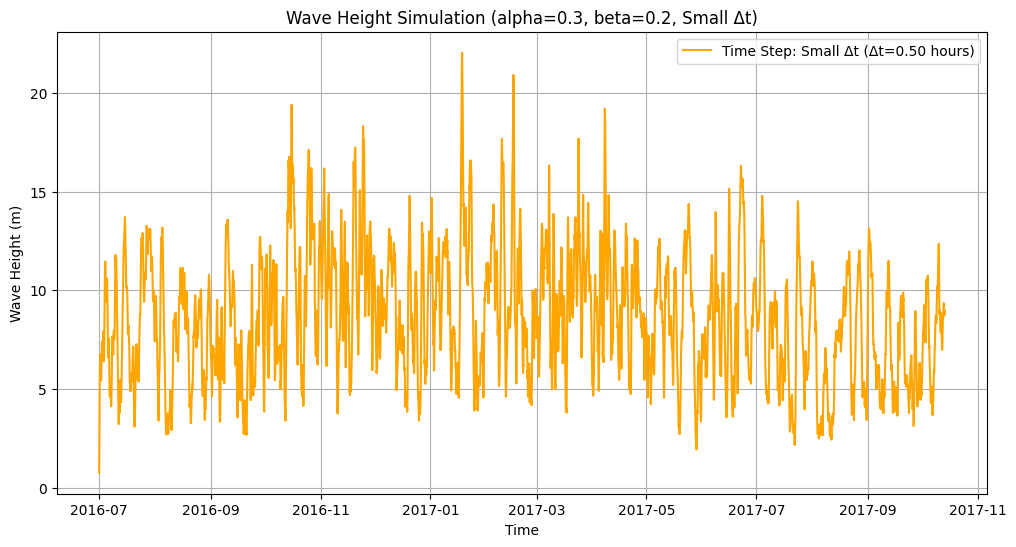

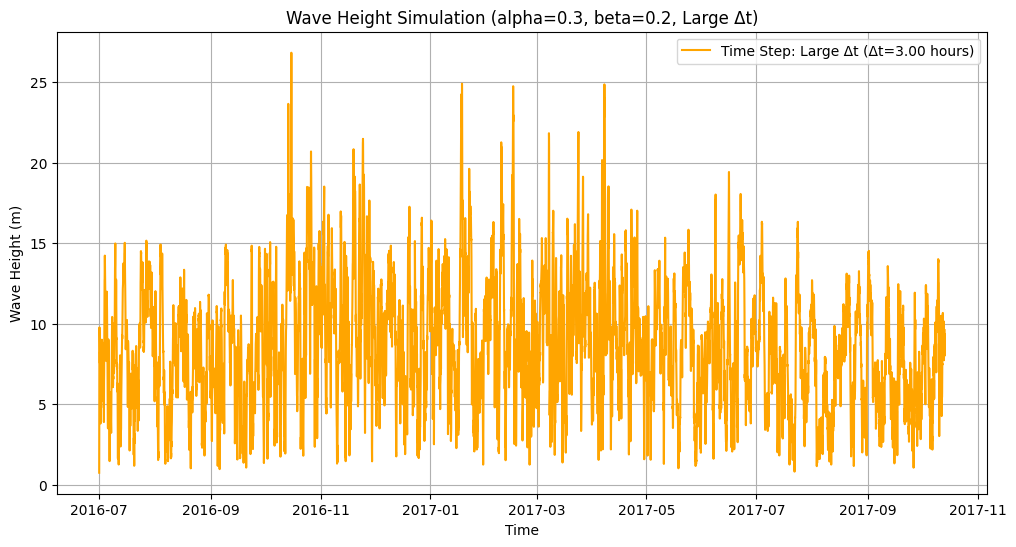

In [ ]:
def plot_wave_height_for_time_steps_separate(alpha, beta, time_step_scenarios, U_t, real_H, time):
    """
    Generates separate wave height simulations for different time step (Δt) scenarios using fixed alpha and beta.
    """
    for scenario_name, dt in time_step_scenarios.items():
        model = OceanWaveModel(alpha=alpha, beta=beta, initial_height=real_H[0])
        model.run_with_data(U_t, dt)

        plt.figure(figsize=(12, 6))
        plt.plot(
            time[:len(model.H_history)],
            model.H_history,
            label=f"Time Step: {scenario_name} (Δt={dt:.2f} hours)",
            color='orange'
        )
        plt.xlabel("Time")
        plt.ylabel("Wave Height (m)")
        plt.title(f"Wave Height Simulation (alpha={alpha}, beta={beta}, {scenario_name})")
        plt.legend()
        plt.grid()
        plt.show()

# Define fixed alpha and beta
alpha = 0.3  # Fixed alpha
beta = 0.2   # Fixed beta

# Use the exact values for the time steps
exact_dt = 1.0  # Original time step in hours
small_dt = exact_dt / 2  # Halve the time step
large_dt = exact_dt * 3  # Double the time step

# Define two time step scenarios with exact values
time_step_scenarios = {
    "Small Δt": small_dt,
    "Large Δt": large_dt
}

# Generate separate plots for the two time step scenarios
print("Simulations for two time step scenarios (separate plots):")
plot_wave_height_for_time_steps_separate(
    alpha=alpha,
    beta=beta,
    time_step_scenarios=time_step_scenarios,
    U_t=wave_data['Relative Wind Speed (m s-1)'].values,
    real_H=wave_data['Wave Height Average (m)'].values,
    time=wave_data['time']
)
